In [30]:
%pylab inline
import torch
# Making sure we can find the data loader
import sys
sys.path.append('..')
sys.path.append('../..')
import load 
#from data import load


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\aduro\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['load']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [31]:
# Let's load the dataset
train_data, train_label = load.get_dogs_and_cats_data(resize=(32,32), n_images=100)
input_size = 32*32*3
to_image = load.to_image_transform()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\Users\\aduro\\OneDrive\\Desktop\\Coding\\Masters UTAustin Data Science\\8 Deep Learning\\Week 3 Deep Networks\\dogs_and_cats\\train'

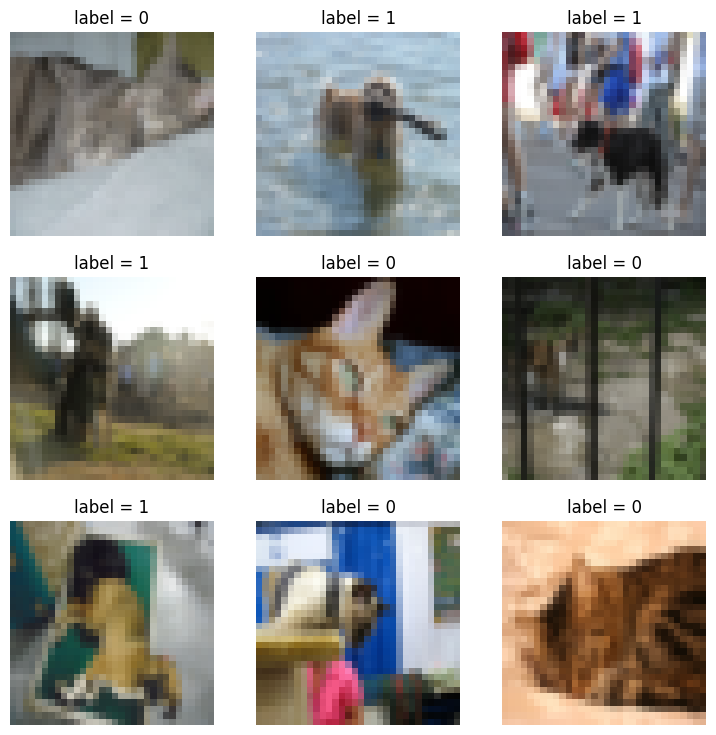

In [24]:
figure(figsize=(9,9))
# Plot the first 9 images (all cats)
for i, (data, label) in enumerate(zip(train_data[:9],train_label[:9])):
    subplot(3,3,1+i)
    imshow(to_image(data))
    title('label = %d'%label)
    axis('off')

In [ ]:
class Network1(torch.nn.Module):
    def __init__(self, n_hidden=100):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_size, n_hidden)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(n_hidden, 1)
    
    def forward(self, x):
        #x.view(x,size(0),-1) guarantees that if you feed in multiple images of size 32x32, the num of images does not change which is x at size 0 
        #and all images are then flattened out along their first dimension. 
        return self.linear2(self.activation(self.linear1(x.view(x.size(0), -1))))


In [ ]:
# Create the network
net1 = Network1(100)
# Run an image through it
print( net1(train_data).view(-1).detach().numpy() )

In [ ]:
# Way to automate this, a netwrok that can have arbitrary number of hidden layers
class Network2(torch.nn.Module):
    def __init__(self, *hidden_size):
        super().__init__()
        layers = []
        # Add the hidden layers
        n_in = input_size
        for n_out in hidden_size:
            layers.append(torch.nn.Linear(n_in, n_out))
            layers.append(torch.nn.ReLU())
            n_in = n_out
        
        # Add the classifier
        layers.append(torch.nn.Linear(n_out, 1))
        # create network that passes infomation sequentially through all these layers
        self.network = torch.nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x.view(x.size(0), -1))

In [ ]:
# Create the network
net2 = Network2(100, 50, 50)
# Run an image through it
print( net2(train_data).view(-1).detach().numpy() )

In [ ]:
plot( net2(train_data[train_label==0]).view(-1).detach().numpy(), '*', label='cats')
plot( net2(train_data[train_label==1]).view(-1).detach().numpy(), '*', label='dogs')
hlines(net2(train_data).mean(), 0, 50)
legend()